In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [11]:
from src import transform 
from src import read_log_file as readlog
#filename = "datasets/s_short"
filename = "datasets/g1_long"
database_table = readlog.get_parsed_data_from_file(filename)

### Seperate the stop the world and concurrent events for analysis

In [12]:
stw_table, concurrent_table = transform.seperatePausesConcurrent(database_table)


### For each event name, create a list of all corresponding data tables

In [13]:
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


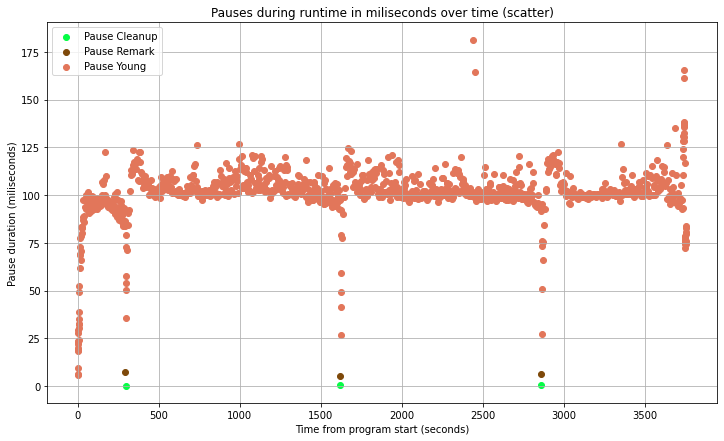

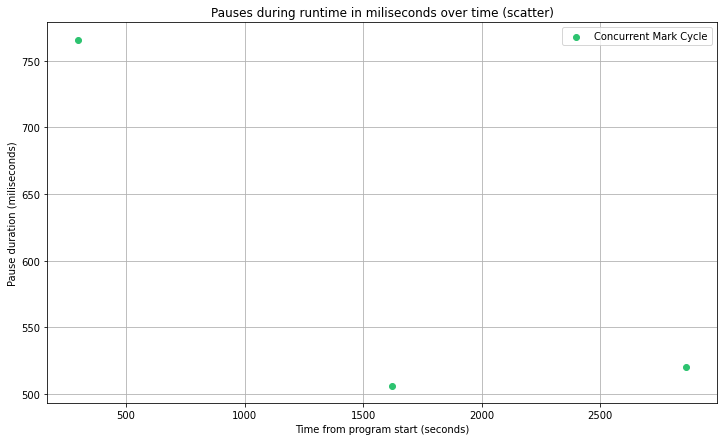

In [14]:
from src import graphing as graph
# Stop the world pauses
stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
labels = transform.get_event_table_labels(stw_seperated_tables)
plot = graph.comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)

# Concurrent periods
c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

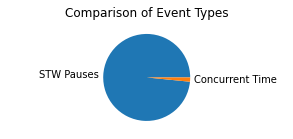

In [15]:
plt.rcParams["figure.figsize"] = [5, 2]
_ = graph.compare_eventtypes_pie(database_table)
plt.rcParams["figure.figsize"] = [12, 7]
# _ = graph.compare_eventtypes_bar(database_table)
# print("\n\nje\n\n")

### Print trends about the events based on Event Type and Name

In [19]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t =========== Concurrent Vs Pauses Table ===========\n")
stw_times,stw_durations    = transform.get_time_and_event_durations(stw_table)
concurrent_times, concurrent_durations = transform.get_time_and_event_durations(concurrent_table)
graph.compare_trends([stw_durations, concurrent_durations], labels = labels, lists_of_timestamps = [stw_times, concurrent_times])
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Table ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_trends(c_duration_lists, labels = labels, lists_of_timestamps = c_time_lists)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Table ===========\n")
graph.compare_trends(stw_duration_lists, labels = labels, lists_of_timestamps = stw_time_lists)



		 =========== Concurrent Vs Pauses Table ===========

 Trends (ms) |  Total Pauses|  Max pause   |  Sum pauses  |  Mean pauses |  Std Dev.    | Throughput   |
--------------------------------------------------------------------------------------------------------
Pauses       | 1116         | 181.425      | 111812.308   | 100.1902     | 16.4519      | 97.03%       | 
Concurrent   | 3            | 765.915      | 1792.247     | 597.4157     | 119.2751     | 99.94%       | 




			=========== Concurrent Table ===========

 Trends (ms) |  Total Pauses|  Max pause   |  Sum pauses  |  Mean pauses |  Std Dev.    | Throughput   |
--------------------------------------------------------------------------------------------------------
Mark Cycle   | 3            | 765.915      | 1792.247     | 597.4157     | 119.2751     | 99.94%       | 




			=========== Pauses Table ===========

 Trends (ms) |  Total Pauses|  Max pause   |  Sum pauses  |  Mean pauses |  Std Dev.    | Throughput   |
--------

### Compare percentiles for pauses/concurrent phases, general and specific


In [20]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t\t=========== Concurrent Vs Pauses ===========\n")
graph.compare_pauses_percentiles([stw_durations, concurrent_durations], labels = labels)
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Percentiles ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_pauses_percentiles(c_duration_lists, labels = labels)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Percentiles ===========\n")
graph.compare_pauses_percentiles(stw_duration_lists, labels = labels)




			=========== Concurrent Vs Pauses ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Pauses     | 101.041 m | 106.101 m | 112.983 m | 117.244 m | 130.231 m | 165.385 m | 179.647 m | 
Concurrent | 519.933 m | 642.924 m | 716.719 m | 741.317 m | 760.995 m | 765.423 m | 765.866 m | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Mark Cycle | 519.933 m | 642.924 m | 716.719 m | 741.317 m | 760.995 m | 765.423 m | 765.866 m | 




			=========== Pauses Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
---------------------------------------------------------------

### Average time in seconds per phase  / grouping

Text(0.5, 1.0, 'Mean STW vs. Concurrent Durations in miliseconds')

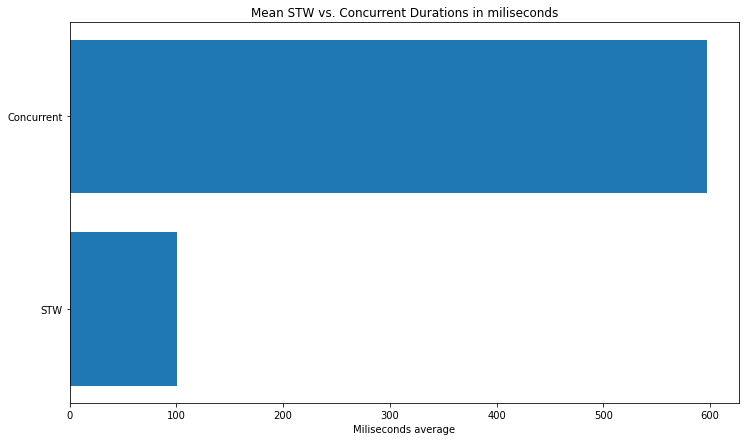

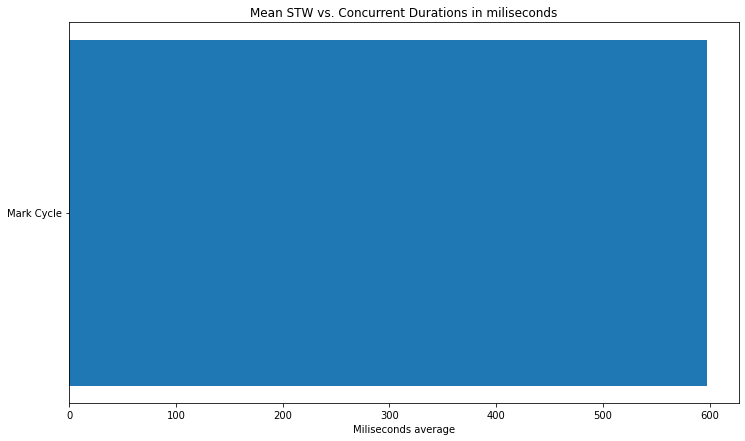

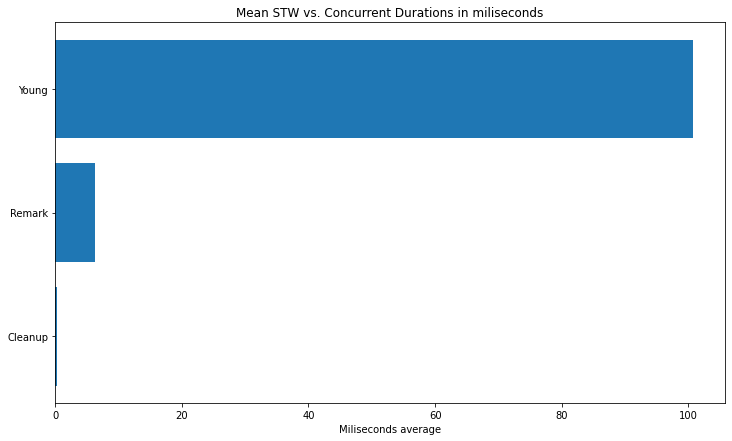

In [24]:
import numpy as np
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["STW", "Concurrent"]
fig, ax = plt.subplots()
y, y1 = stw_durations, concurrent_durations # i know , this is not good code. I will fix this when I turn this into an API Call.
pause_avg = round(sum(y)/len(y), 4)
concurrent_avg = round(sum(y1)/len(y1), 4)
ax.barh(np.arange(len(labels)), [pause_avg, concurrent_avg], align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')
########

labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
fig, ax = plt.subplots()
c_duration_averages = []
for i in range(len(c_duration_lists)):
    c_duration_averages.append(sum(c_duration_lists[i]) / len(c_duration_lists[i]))
ax.barh(np.arange(len(c_duration_averages)), c_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')


fig, ax = plt.subplots()
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
stw_duration_averages = []
for i in range(len(stw_duration_lists)):
    stw_duration_averages.append(sum(stw_duration_lists[i]) / len(stw_duration_lists[i]))
ax.barh(np.arange(len(labels)), stw_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')


In [56]:
# Access data from a particular log
log = "datasets/demo_data/demo_shenandoah.log"
data = search.getParsedData(log)
data = transform.getPausesData(data)
print(data)
#data = transform.getConcurrentData(data)
seperate_lists = transform.seperateEventName(data)
    
# for item in seperate_lists:
#     print(item)
#     print("\n\n\n")

NameError: name 'search' is not defined

In [ ]:
# Using the seperate lists, plot pauses in miliseconds
xdata = []
ydata = []
for i in range(len(seperate_lists)):
    x = list(map(float, x))
    y = list(map(float, y))
    xdata.append(x)
    ydata.append(y)
eventtype = seperate_lists[0]["EventType"].iloc[0]
labels = [seperate_lists[i]["EventType"].iloc[0] + " " + seperate_lists[i]["EventName"].iloc[0] for i in range(len(seperate_lists))]
graph = uplt.comparrison_scatter(xdata, ydata, None, None, labels)
graph = graph.set_title(eventtype + " comparions")

In [ ]:
short_labels = list(label[10:] for label in labels)
uplt.compare_pauses_percentiles(ydata, labels=short_labels)


In [ ]:
uplt.compare_trends(ydata, labels=short_labels)

In [ ]:
_= uplt.compare_paused_running_line(xdata, ydata, labels=labels)

In [ ]:
def confirm_difference(lists):
    [print(len(lists[i])) for i in range(len(lists))]
confirm_difference(ydata)
confirm_difference(xdata)